DADDIO Melanie -
FIX Emma -
MARZOUK Moustafa -
RAKOTOMANANA Zava 

#### **Identifier quels pays s'en sortent relativement bien et lesquels nécessitent une attention immédiate ?**

# Installation des packages nécessaires à l'étude

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from skimpy import skim

# from pingouin import partial_corr

# Import des données

In [4]:
#import
CovidCases = pd.read_csv("/Users/melaniedaddio/Desktop/M2_S1/apprentissage_statistique/apprentissage_statistique/CovidCases.csv", sep=",")

CovidCases


,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation
0,1,Yemen,9369,1778.0,5921,1670,306,58.0,265253.0,8651.0,30660443
1,2,Vietnam,839662,20555.0,782199,36908,8529,209.0,42517091.0,431850.0,98453377
2,3,Uzbekistan,178637,1271.0,174213,3153,5241,37.0,1377915.0,40425.0,34086135
3,4,UAE,737890,2114.0,731295,4481,73477,211.0,87246490.0,8687776.0,10042442
4,5,Turkey,7444552,66180.0,6893476,484896,87077,774.0,89847975.0,1050928.0,85493959
5,6,Timor-Leste,19673,119.0,19332,222,14569,88.0,169501.0,125523.0,1350361
6,7,Thailand,1720919,17751.0,1592903,110265,24576,254.0,9201621.0,131408.0,70023091
7,8,Tajikistan,17084,124.0,16960,0,1742,13.0,NaN,NaN,9809760
8,9,Taiwan,16305,846.0,15306,153,683,35.0,6754661.0,282957.0,23871692
9,10,Syria,36953,2341.0,24503,10109,2048,130.0,103566.0,5741.0,18040518


# Compréhension des données

In [5]:
skim(CovidCases)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 49     │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA %     ┃ mean     ┃ sd       ┃ p0     ┃ p25     ┃ p50      ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ ID       │  0 │        0 │       25 │    14.29 │      1 │      13 │       25 │       37 │      49 │ ▇▇▇▇▇█ │  │
│ │ TotalCas │  0 │        0 │  1575000 │  4943000 │     77 │  115100 │   412100 │   905600 │ 3397000 │   █    │  │
│ │ es       │    │          │          │          │        │         │          │          │       0 │        │  │
│ │ TotalDea │  1 │ 2.040816 │    23730 │    68850 │      3 │    1360 │     5106 │    17800 │  450800 │   █    │  │
│ │ ths      │    │ 32653061 │          │          │        │         │          │          │         │        │  │
│ │          │    │       23 │          │          │        │         │          │          │         │        │  │
│ │ TotalRec │  0 │        0 │  1510000 │  4829000 │     64 │   91070 │   391400 │   847500 │ 3329000 │   █    │  │
│ │ overed   │    │          │          │          │        │         │          │          │       0 │        │  │
│ │ ActiveCa │  0 │        0 │    41390 │    89900 │      0 │    1670 │    14790 │    29240 │  484900 │   █▁   │  │
│ │ ses      │    │          │          │          │        │         │          │          │         │        │  │
│ │ TotalCas │  0 │        0 │    43870 │    46260 │     67 │    6484 │    24310 │    78710 │  159700 │ █▁▁▂ ▁ │  │
│ │ esPerMil │    │          │          │          │        │         │          │          │         │        │  │
│ │ lion     │    │          │          │          │        │         │          │          │         │        │  │
│ │ TotalDea │  1 │ 2.040816 │    455.4 │    489.4 │      3 │   128.5 │    326.5 │    626.8 │    2329 │  █▄▁▁  │  │
│ │ thsPerMi │    │ 32653061 │          │          │        │         │          │          │         │        │  │
│ │ llion    │    │       23 │          │          │        │         │          │          │         │        │  │
│ │ TotalTes │  1 │ 2.040816 │ 29530000 │ 86520000 │   4951 │ 2335000 │  7978000 │ 25100000 │ 5836000 │   █    │  │
│ │ ts       │    │ 32653061 │          │          │        │         │          │          │      00 │        │  │
│ │          │    │       23 │          │          │        │         │          │          │         │        │  │
│ │ TotalTes │  1 │ 2.040816 │  1173000 │  1864000 │   5741 │  141000 │   424800 │  1032000 │ 8688000 │  █▁▁   │  │
│ │ tsPerMil │    │ 32653061 │          │          │        │         │          │          │         │        │  │
│ │ lion     │    │       23 │          │          │    

In [6]:
# vérifier qu'il n'y ai pas de valeurs "bizarre"
CovidCases[CovidCases['TotalCases']<CovidCases["TotalDeaths"]]

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation


In [7]:
CovidCases[CovidCases['TotalCasesPerMillion']<CovidCases["TotalDeathsPerMillion"]]

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation


In [8]:
CovidCases[CovidCases['TotalPopulation']<CovidCases["TotalCases"]]

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation


In [9]:
CovidCases[CovidCases['TotalPopulation']<CovidCases["TotalRecovered"]]

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation


Il ne semble pas avoir des valeurs "bizarre".

## Visualisation des données :

In [10]:
continue_var = CovidCases.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_var = CovidCases.select_dtypes(include=['object']).columns.tolist()

### Visualisation des variables continues :

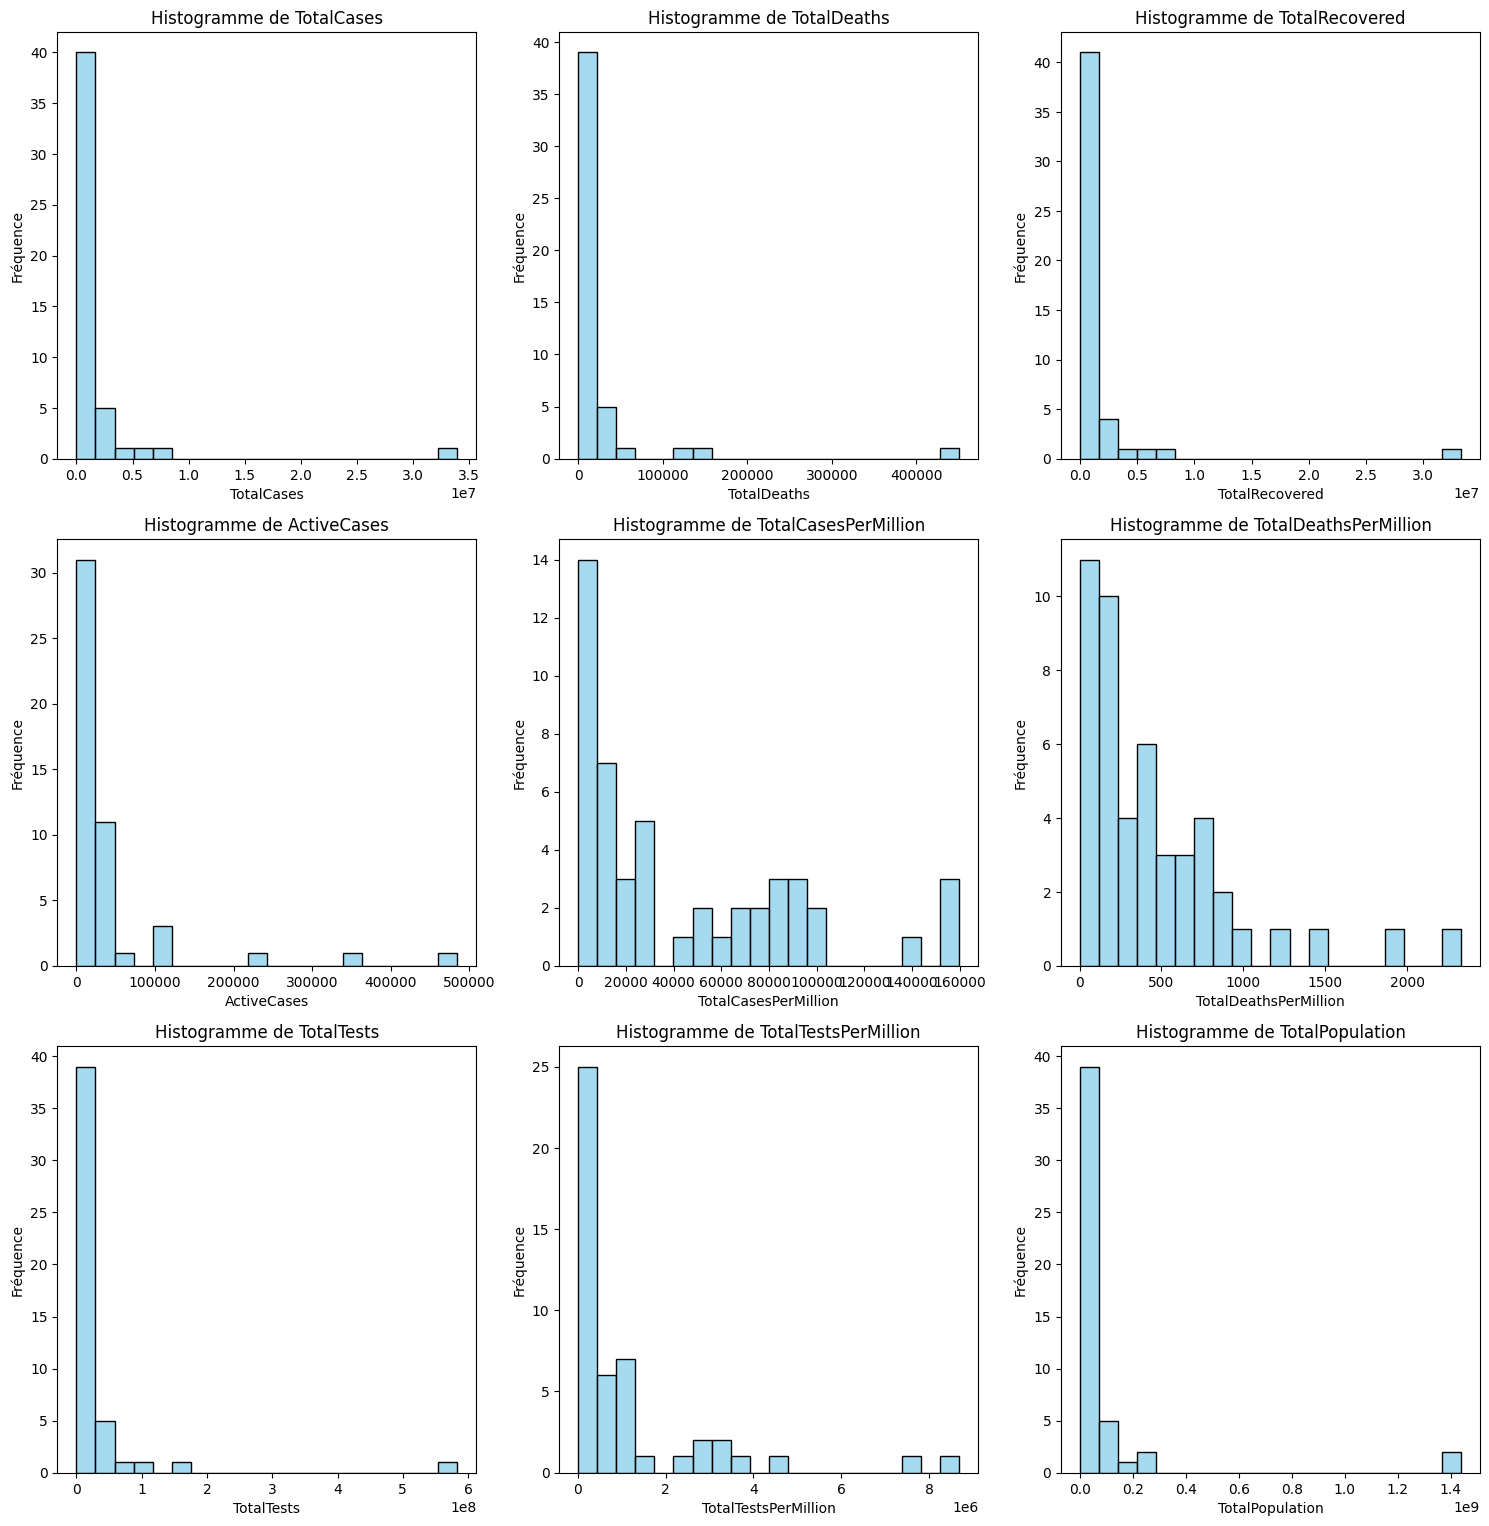

In [11]:
# On affiche les histogrammes des variables continues

n_cols = 3  # Nombre de colonnes par ligne
n_rows = (len(continue_var) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5)) 

for i, col in enumerate(continue_var[1:]):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.histplot(CovidCases[col], color='skyblue', bins=20)  
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

plt.tight_layout()  
plt.show()


/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_74899/1722766216.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=CovidCases[col], palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_74899/1722766216.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=CovidCases[col], palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_74899/1722766216.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=CovidCases[col], palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel

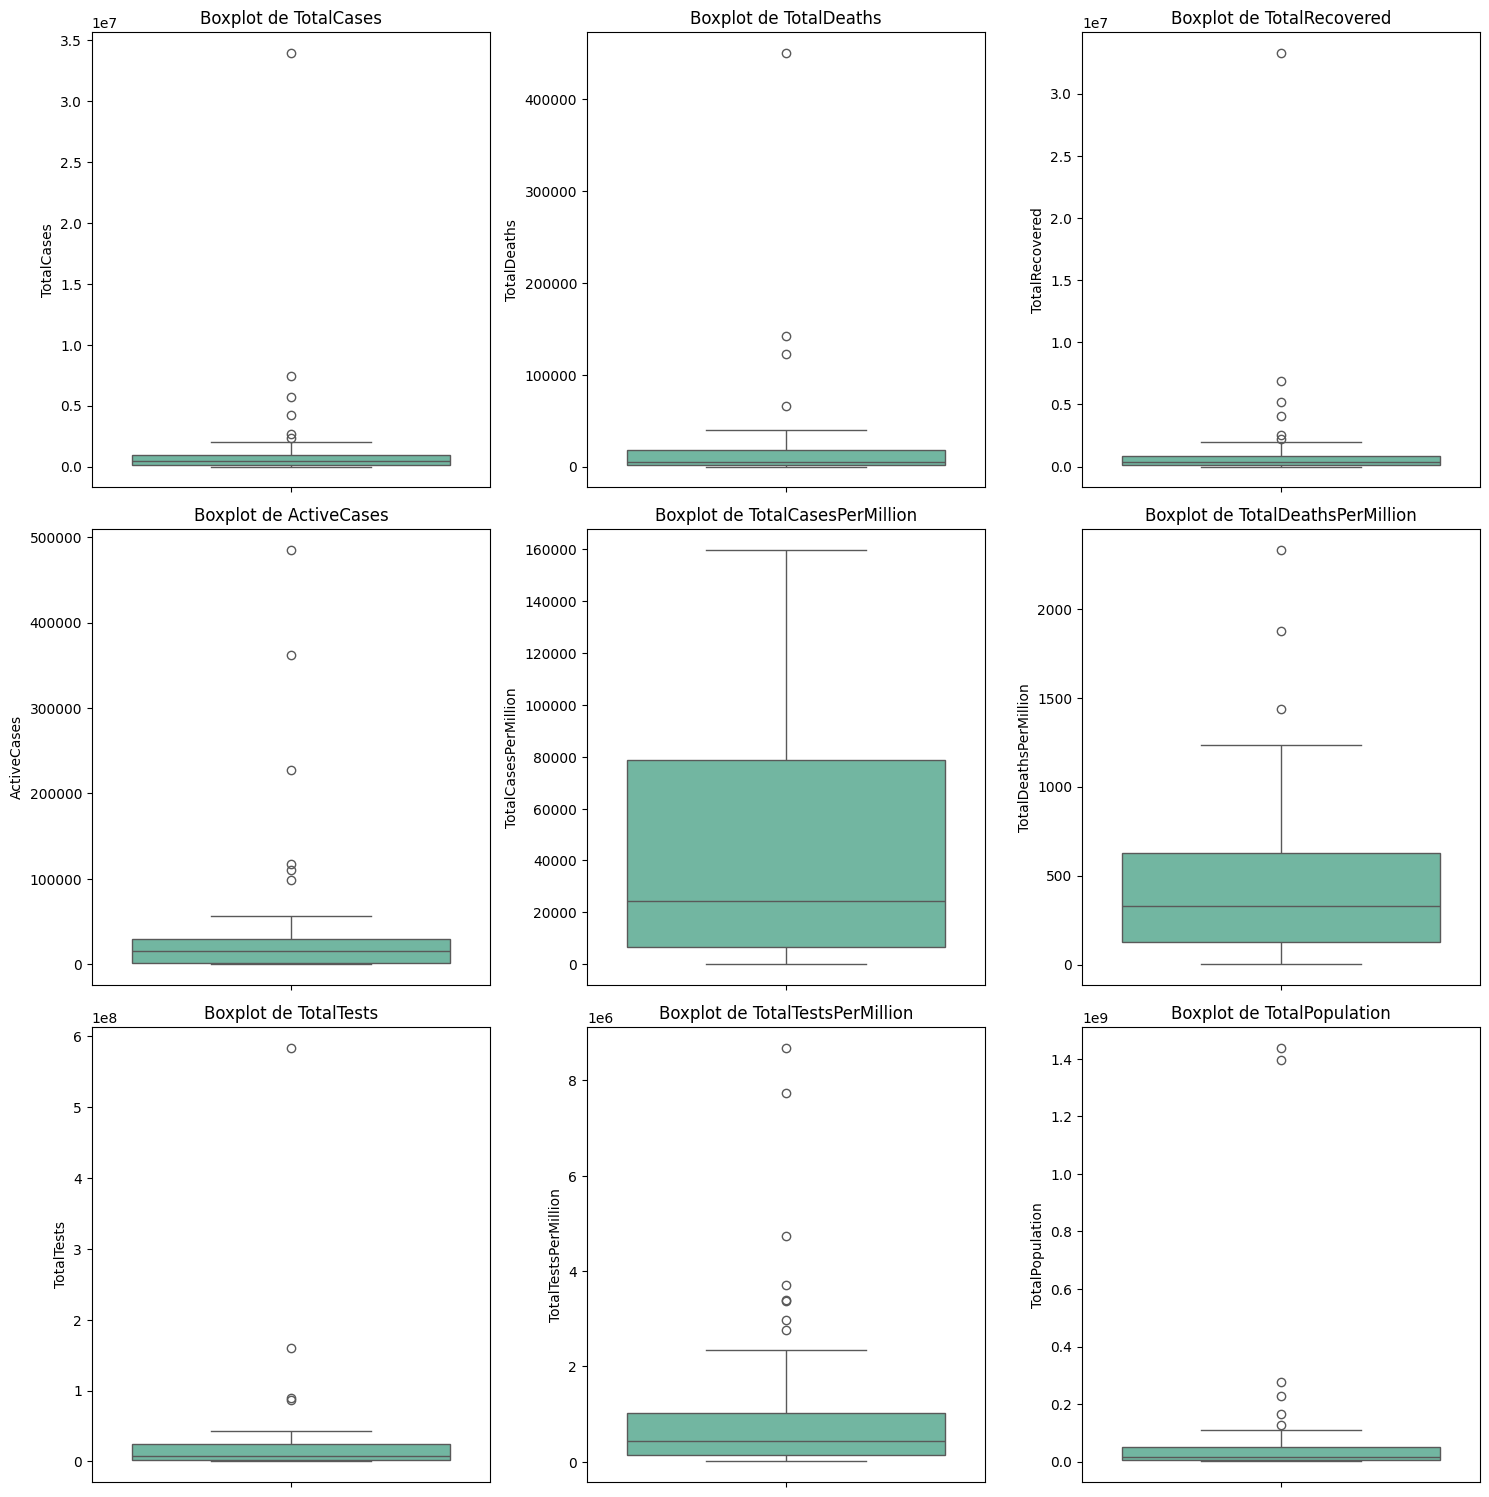

In [12]:
# BOXPLOT
n_cols = 3
n_rows = (len(continue_var) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, col in enumerate(continue_var[1:]):
    plt.subplot(n_rows, n_cols, i + 1) 
    sns.boxplot(y=CovidCases[col], palette='Set2')  
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()

plt.show()

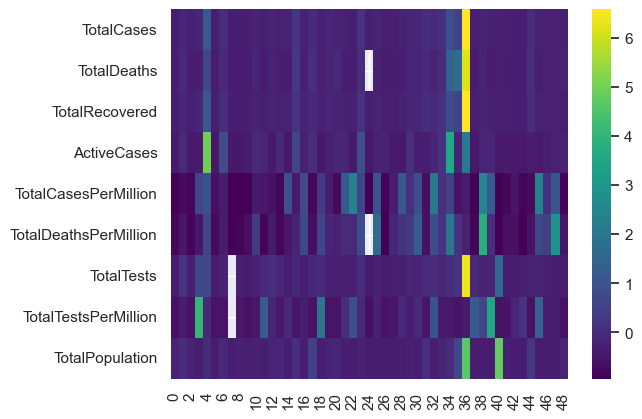

In [13]:
# Visualisationdes valaurs extremes heatmap
CC = CovidCases.iloc[:,2:]
CC_c = CC.sub(CC.mean())
CC_cr = CC_c.div(CC_c.std()) 
CC_cr = CC_cr.T
sns.set()
sns.heatmap(CC_cr,cmap="viridis") 
plt.show()

### Visualistion des variables continues en fonction des pays :

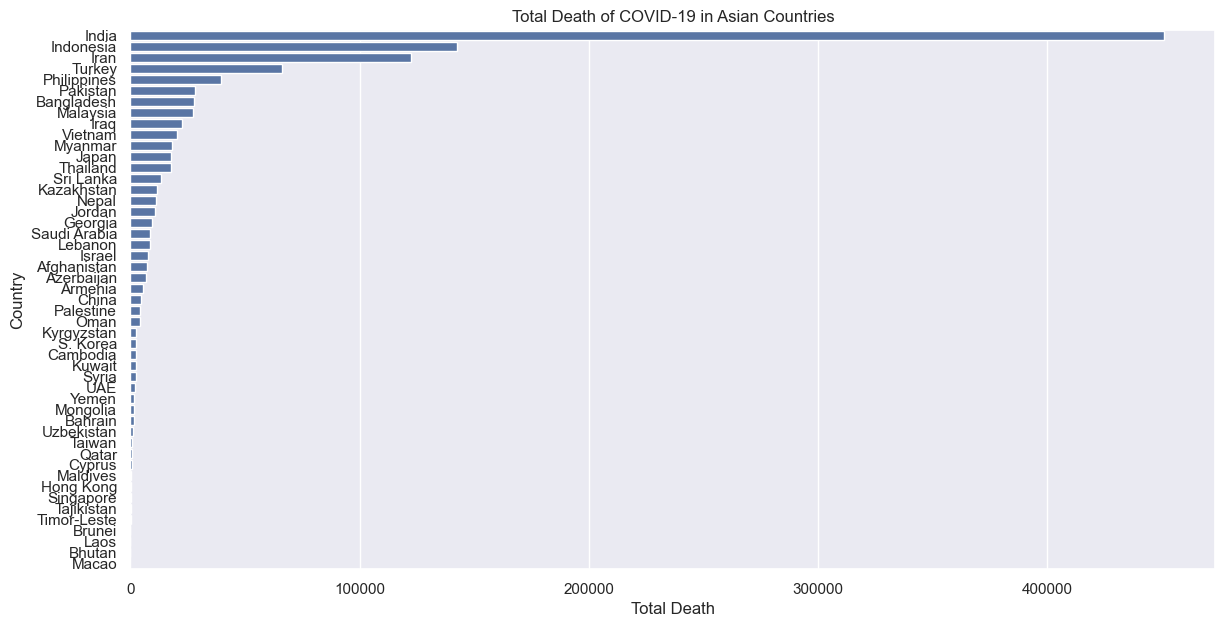

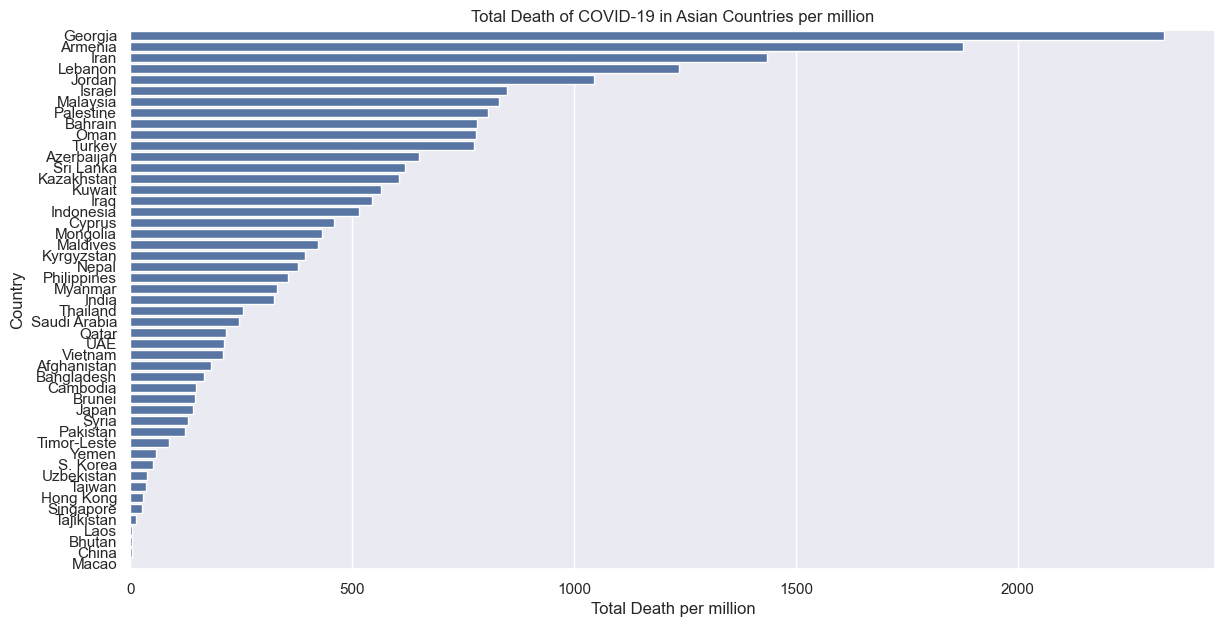

In [14]:
#barplot
#nombre total de cas en fonction du pays
plt.figure(figsize=(14, 7))  
sns.barplot(x='TotalDeaths', y='Country', data=CovidCases.sort_values('TotalDeaths', ascending=False))  
plt.title('Total Death of COVID-19 in Asian Countries')  
plt.xlabel('Total Death')  
plt.ylabel('Country')  
plt.show()

#nombre de cas par million d'individus en fonction du pays
plt.figure(figsize=(14, 7))  
sns.barplot(x='TotalDeathsPerMillion', y='Country', data=CovidCases.sort_values('TotalDeathsPerMillion', ascending=False))  
plt.title('Total Death of COVID-19 in Asian Countries per million')  
plt.xlabel('Total Death per million')  
plt.ylabel('Country')  
plt.show()

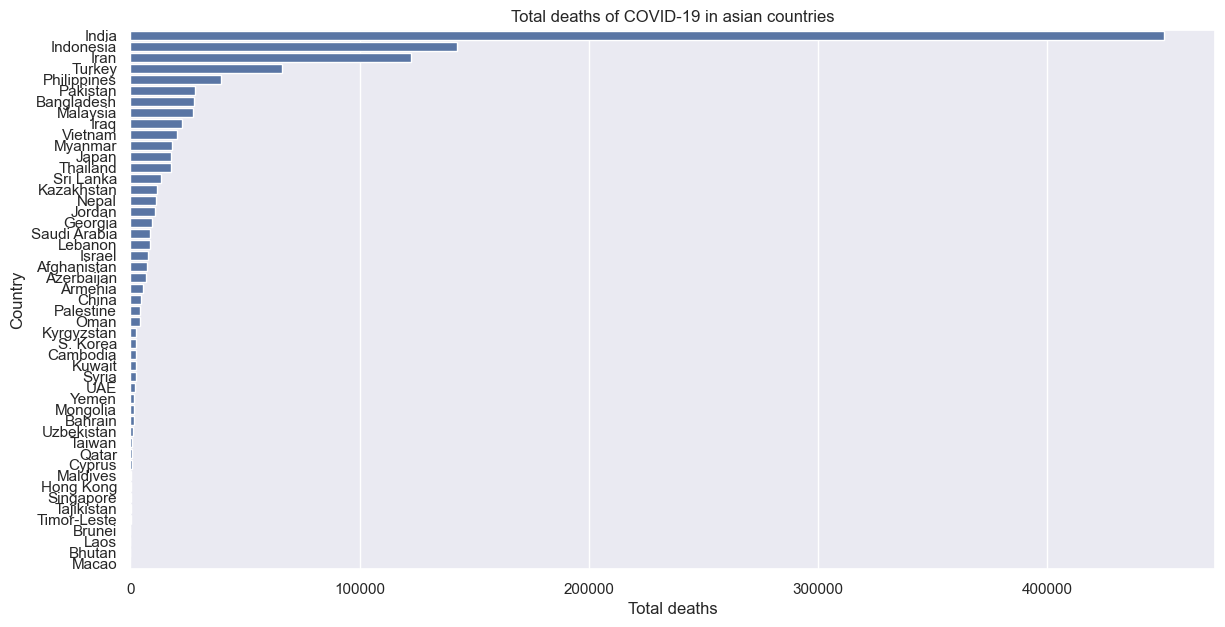

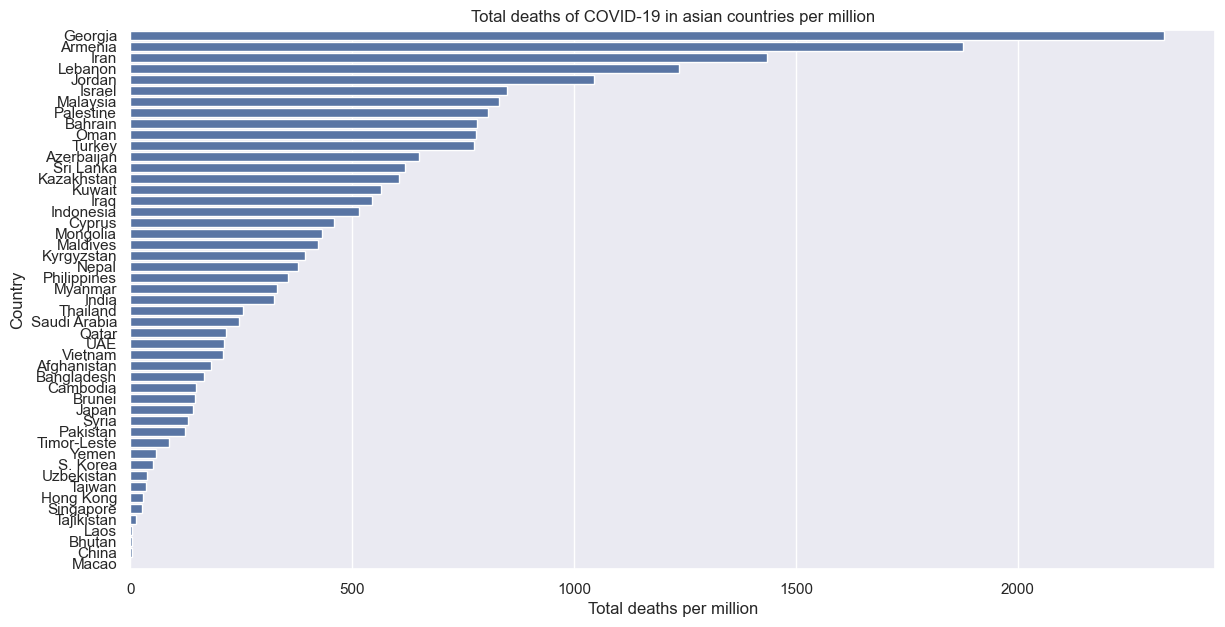

In [15]:
#nombre total de mort en fonction du pays
plt.figure(figsize=(14, 7))  
sns.barplot(x='TotalDeaths', y='Country', data=CovidCases.sort_values('TotalDeaths', ascending=False))  
plt.title('Total deaths of COVID-19 in asian countries')  
plt.xlabel('Total deaths')  
plt.ylabel('Country')  
plt.show()

#nombre de mort par million d'individus en fonction du pays
plt.figure(figsize=(14, 7))  
sns.barplot(x='TotalDeathsPerMillion', y='Country', data=CovidCases.sort_values('TotalDeathsPerMillion', ascending=False))  
plt.title('Total deaths of COVID-19 in asian countries per million')  
plt.xlabel('Total deaths per million')  
plt.ylabel('Country')  
plt.show()

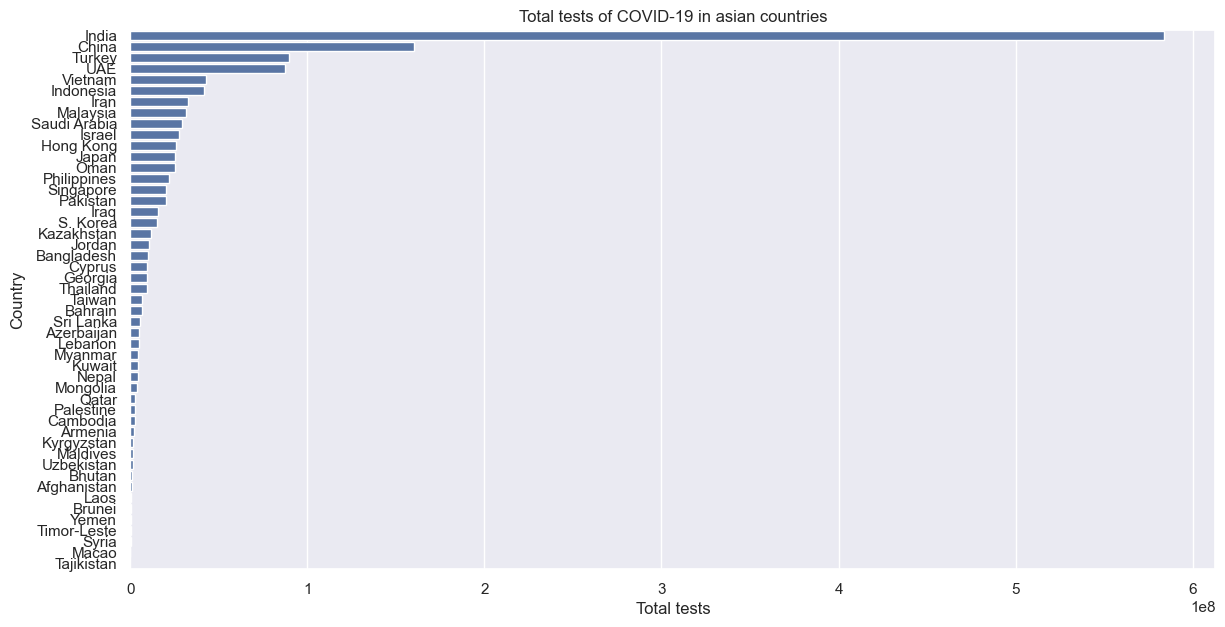

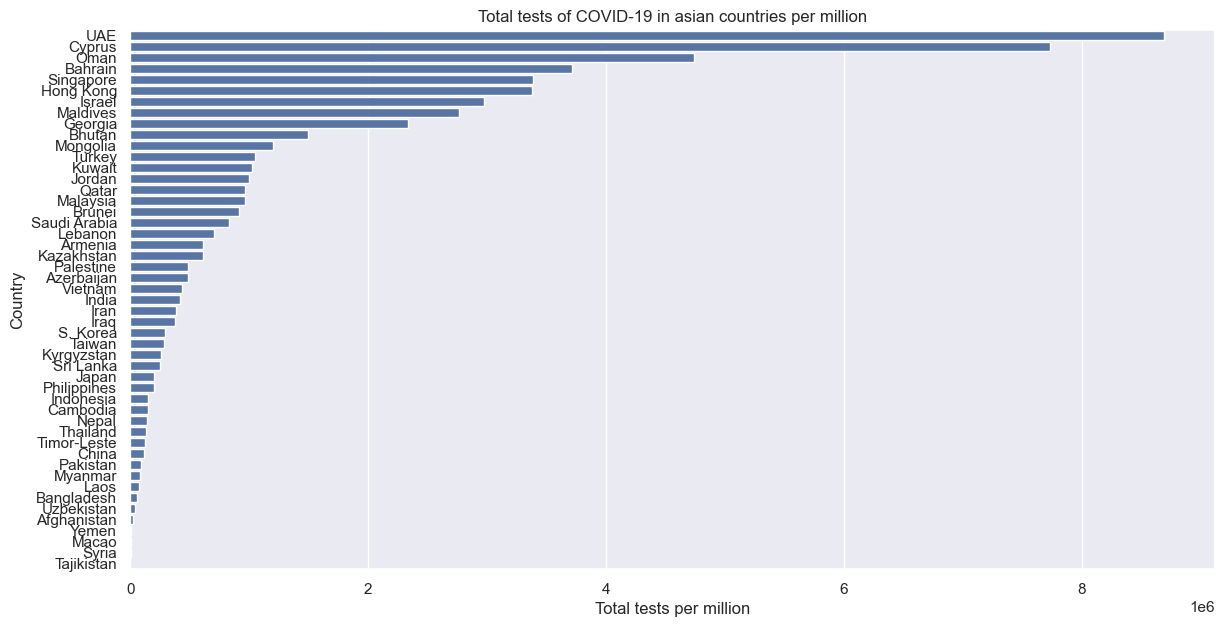

In [16]:
#nombre total de test en fonction du pays
plt.figure(figsize=(14, 7))  
sns.barplot(x='TotalTests', y='Country', data=CovidCases.sort_values('TotalTests', ascending=False))  
plt.title('Total tests of COVID-19 in asian countries')  
plt.xlabel('Total tests')  
plt.ylabel('Country')  
plt.show()

#nombre de test par million d'individus en fonction du pays
plt.figure(figsize=(14, 7))  
sns.barplot(x='TotalTestsPerMillion', y='Country', data=CovidCases.sort_values('TotalTestsPerMillion', ascending=False))  
plt.title('Total tests of COVID-19 in asian countries per million')  
plt.xlabel('Total tests per million')  
plt.ylabel('Country')  
plt.show()

## Analyse de relation entre variables : 

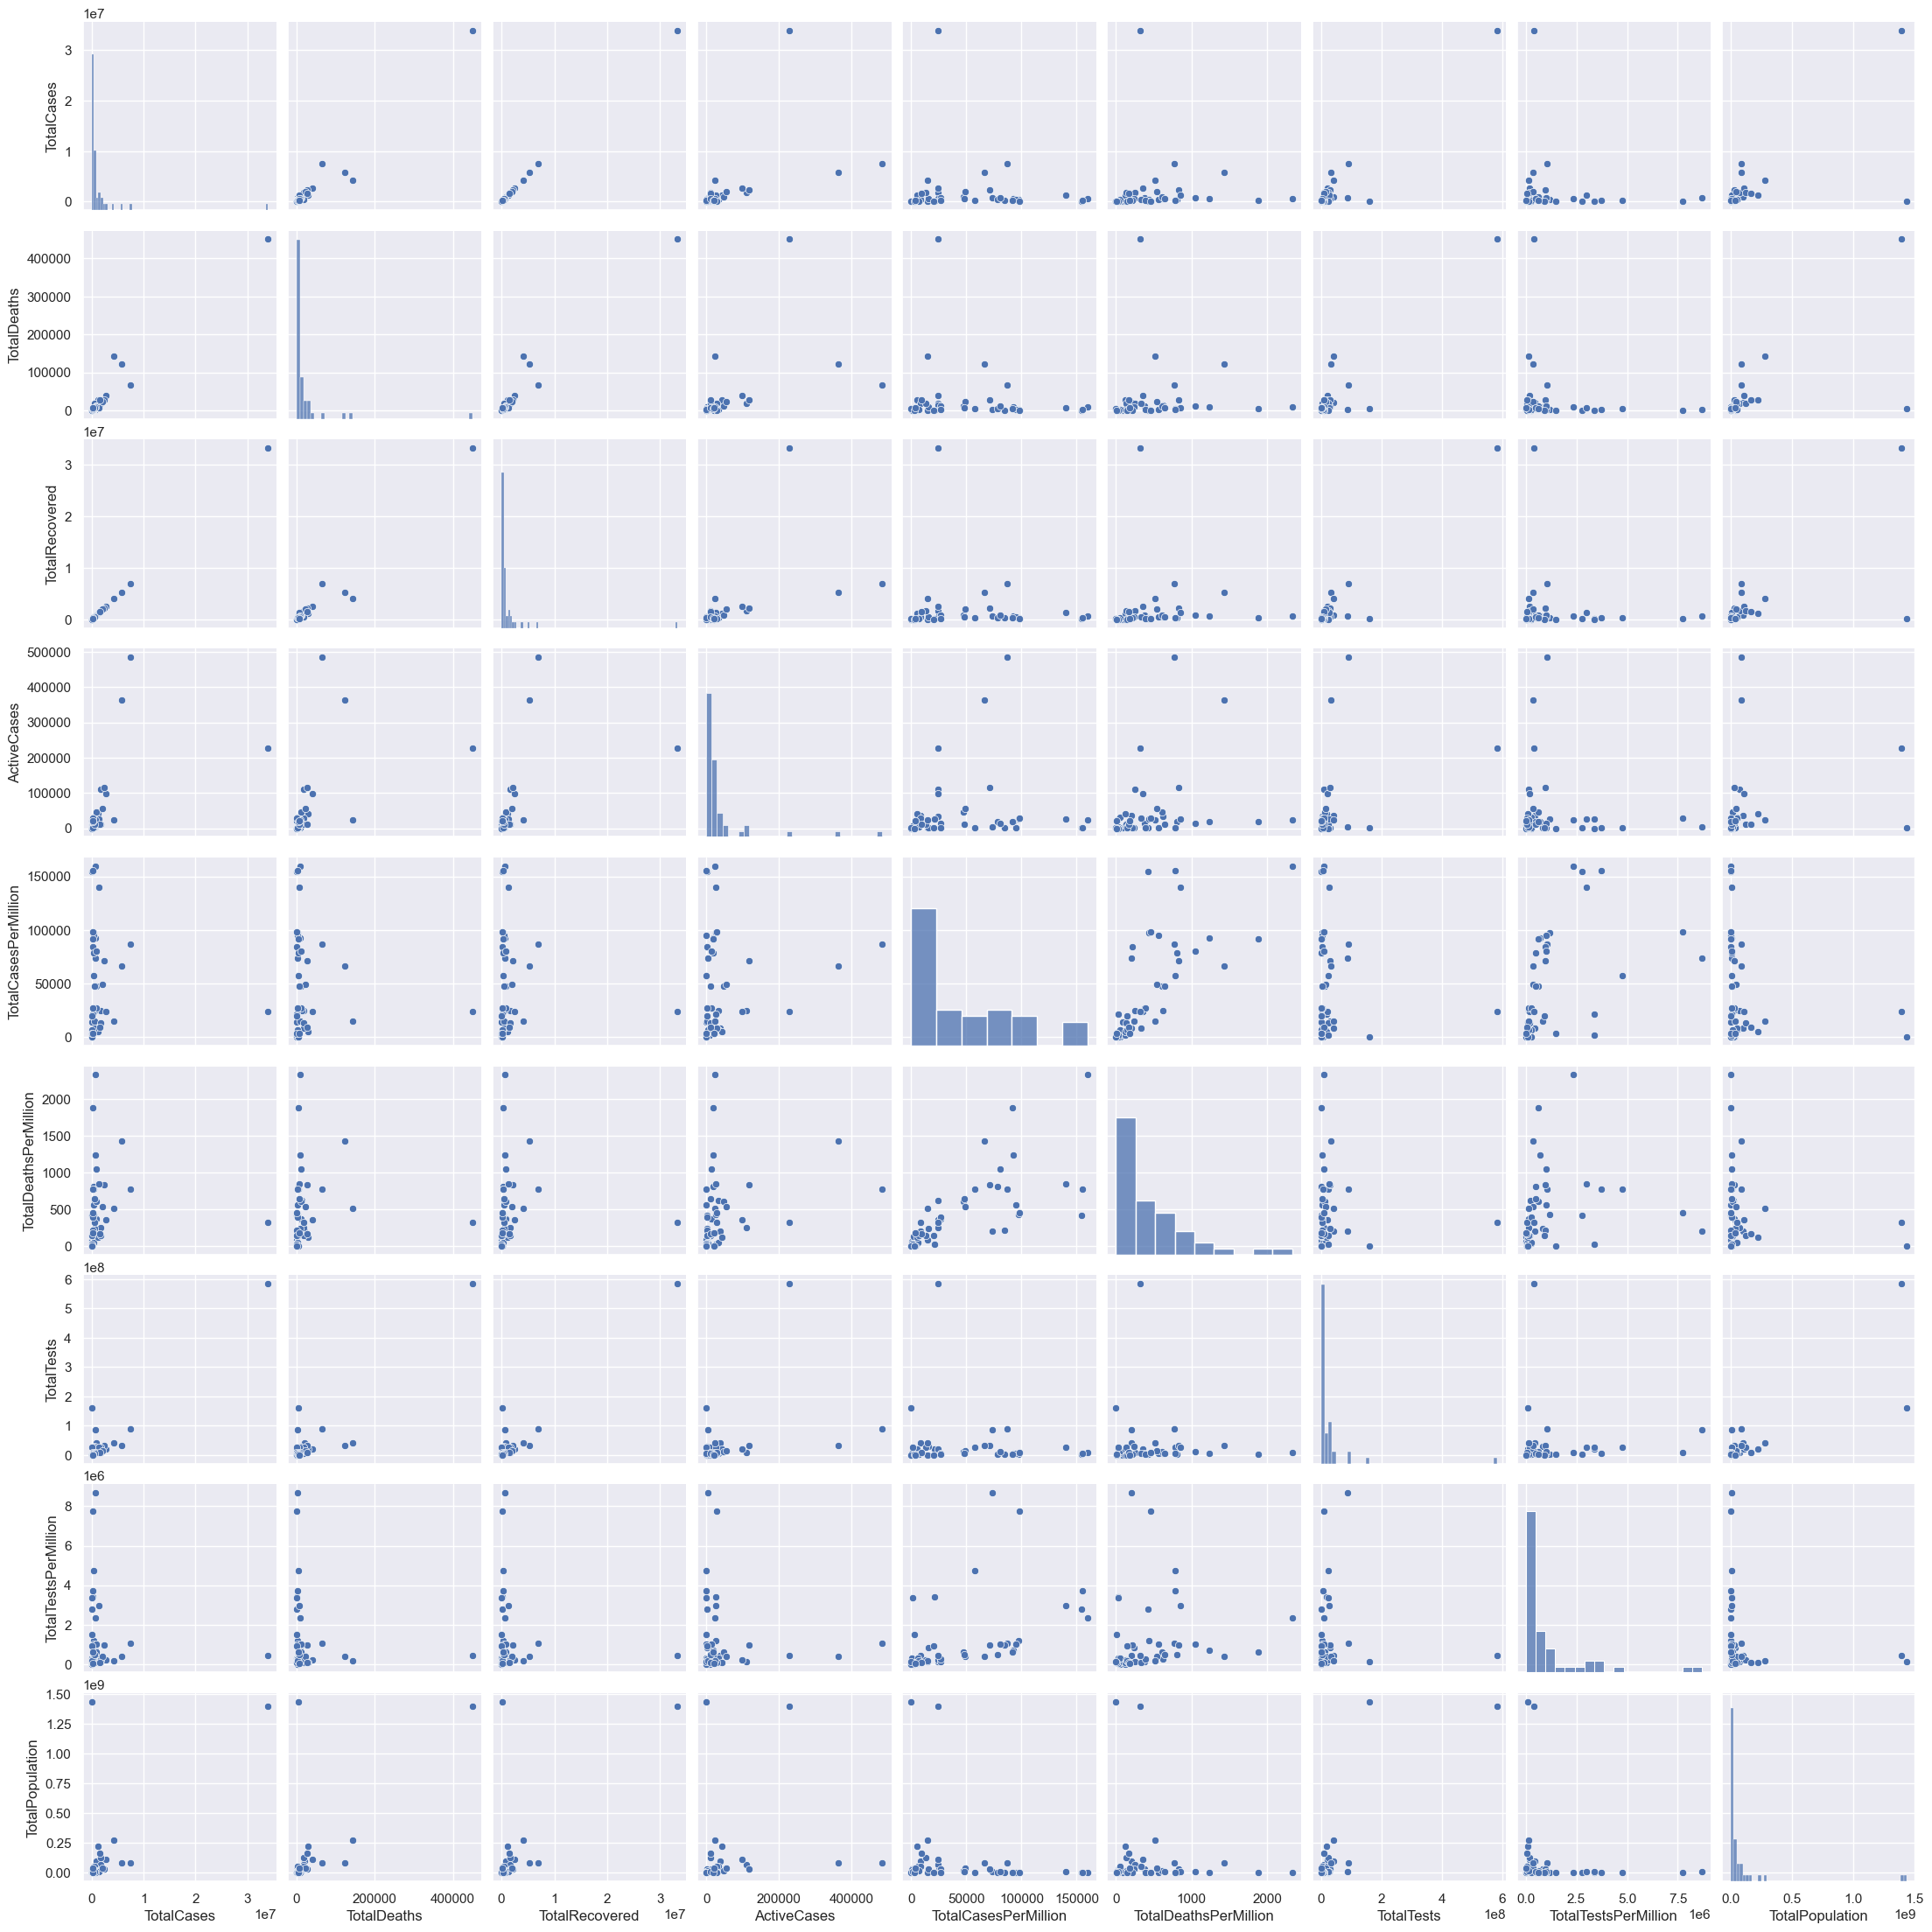

In [17]:
#plot de x en fonction de y (pour préparer une éventuelle prédiction)
sns.pairplot(CovidCases.iloc[:,2:])

On a decidé de ne pas preter plus d'attention aux pairplot car nous ne remarquons pas un tendance particulière.

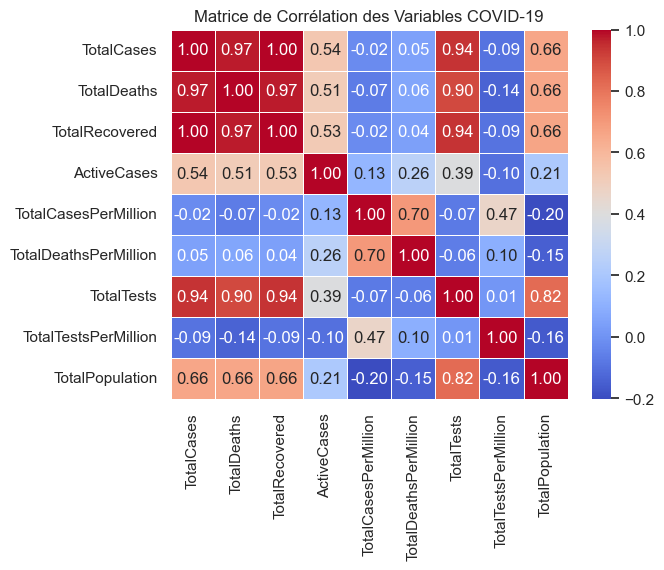

In [18]:
# matrice correlation 
corr_matrix = CovidCases.iloc[:,2:].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation des Variables COVID-19")
plt.show()

# Données manquantes 

En regardant sur le site on remarque que jusqu'à mi 2022 le Macao avait un total de mort déclaré à 0. Pour se pays nous imputerons donc les valeurs manquantes "totaldeath" et "totaldeathpermillion" à 0.

Pour le Tajikistan nous n'avons pas trouvé le nombre de tests dans le site nous allons donc emputer par la mediane. De plus la variable test ne nous a pas parue tres pertinente pour la suite de notre analyse et nous allons surment pas l'utiliser.

In [19]:
CovidCases.loc[CovidCases["Country"] == "Macao", :] = CovidCases.loc[CovidCases["Country"] == "Macao", :].fillna(0)

In [20]:
print(CovidCases.isnull().sum()) 

#imputation par médiane
CovidCases.fillna(CovidCases.median(numeric_only=True), inplace=True) 

print(CovidCases.isnull().sum()) 

ID                       0
Country                  0
TotalCases               0
TotalDeaths              0
TotalRecovered           0
ActiveCases              0
TotalCasesPerMillion     0
TotalDeathsPerMillion    0
TotalTests               1
TotalTestsPerMillion     1
TotalPopulation          0
dtype: int64
ID                       0
Country                  0
TotalCases               0
TotalDeaths              0
TotalRecovered           0
ActiveCases              0
TotalCasesPerMillion     0
TotalDeathsPerMillion    0
TotalTests               0
TotalTestsPerMillion     0
TotalPopulation          0
dtype: int64


# Tests d'independance : test de corrélation de pearson

In [21]:
#TotalCases vs TotalDeaths
print(pearsonr(CovidCases.TotalCases, CovidCases.TotalDeaths))

#TotalCasesPerMillion vs TotalDeathsPerMillion
print(pearsonr(CovidCases.TotalCasesPerMillion, CovidCases.TotalDeathsPerMillion))

#TotalCases vs TotalDeathsPerMillion
print(pearsonr(CovidCases.TotalCases, CovidCases.TotalDeathsPerMillion))

#TotalCases vs TotalCasesPerMillion
print(pearsonr(CovidCases.TotalCases, CovidCases.TotalCasesPerMillion))

PearsonRResult(statistic=np.float64(0.974534830348246), pvalue=np.float64(3.609799472189537e-32))
PearsonRResult(statistic=np.float64(0.7087029768486778), pvalue=np.float64(1.2141825486555002e-08))
PearsonRResult(statistic=np.float64(0.052657647779476104), pvalue=np.float64(0.7193426960259037))
PearsonRResult(statistic=np.float64(-0.0197270202223676), pvalue=np.float64(0.8929776830676286))


In [22]:
# Corrélation partielle en contrôlant la population
# corr_p = partial_corr(data=CovidCases, x='TotalCases', y='TotalCasesPerMillion', covar='TotalPopulation', method='pearson')
# print(corr_p)

# Tests de redondance 

In [23]:
# tester si une variables est une combinaison lineaire c'autres variables
q = CovidCases.select_dtypes(include=[np.number])
q = q.iloc[:,1:]
for col in q.columns:
    X = q.drop(columns=[col]) 
    y = q[col] 
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)

    if r2 > 0.95:
        print(f" {col} est très bien prédite par les autres variables (R² = {r2:.3f}), elle est redondante")

 TotalCases est très bien prédite par les autres variables (R² = 1.000), elle est redondante
 TotalDeaths est très bien prédite par les autres variables (R² = 1.000), elle est redondante
 TotalRecovered est très bien prédite par les autres variables (R² = 1.000), elle est redondante
 ActiveCases est très bien prédite par les autres variables (R² = 1.000), elle est redondante
 TotalTests est très bien prédite par les autres variables (R² = 0.988), elle est redondante


On voit bien que les variables qui existent avec "PerMillion" et celles qui existent sans qui sont redondantes, ce qui est totalemnt logique.

# Étude de taux 

## Calculs des taux et visualisation du classement des pays 

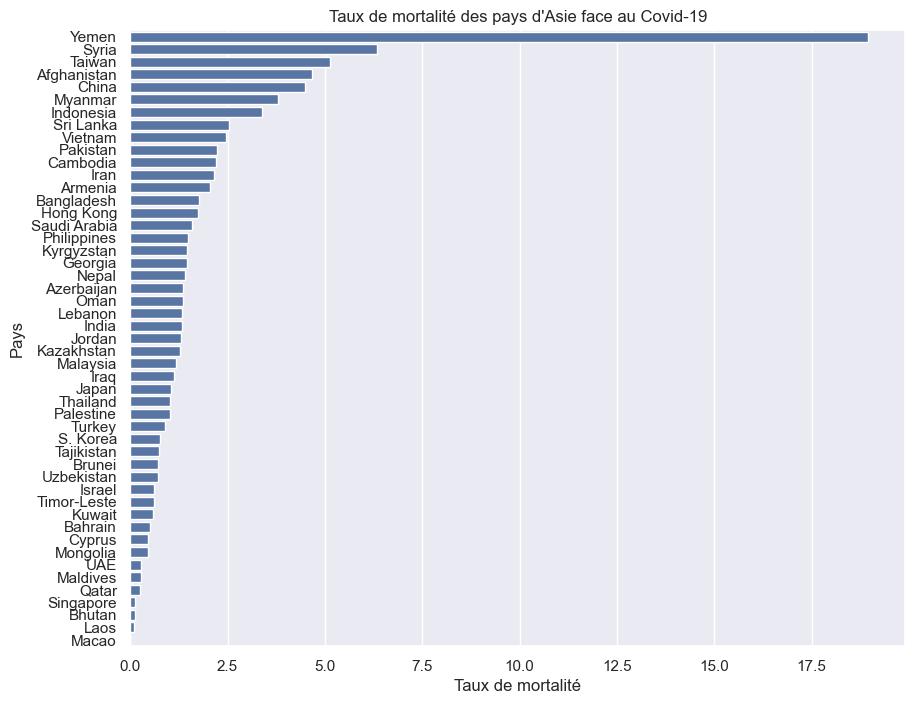

In [24]:
# taux de mortalité 
CovidCases['TauxMortalite'] = CovidCases['TotalDeathsPerMillion'] / CovidCases['TotalCasesPerMillion'] * 100   
plt.figure(figsize=(10,8))
sns.barplot(x='TauxMortalite', y='Country', data=CovidCases.sort_values('TauxMortalite', ascending=False))  
plt.ylabel('Pays')
plt.xlabel('Taux de mortalité')  
plt.title("Taux de mortalité des pays d'Asie face au Covid-19")
plt.show() 

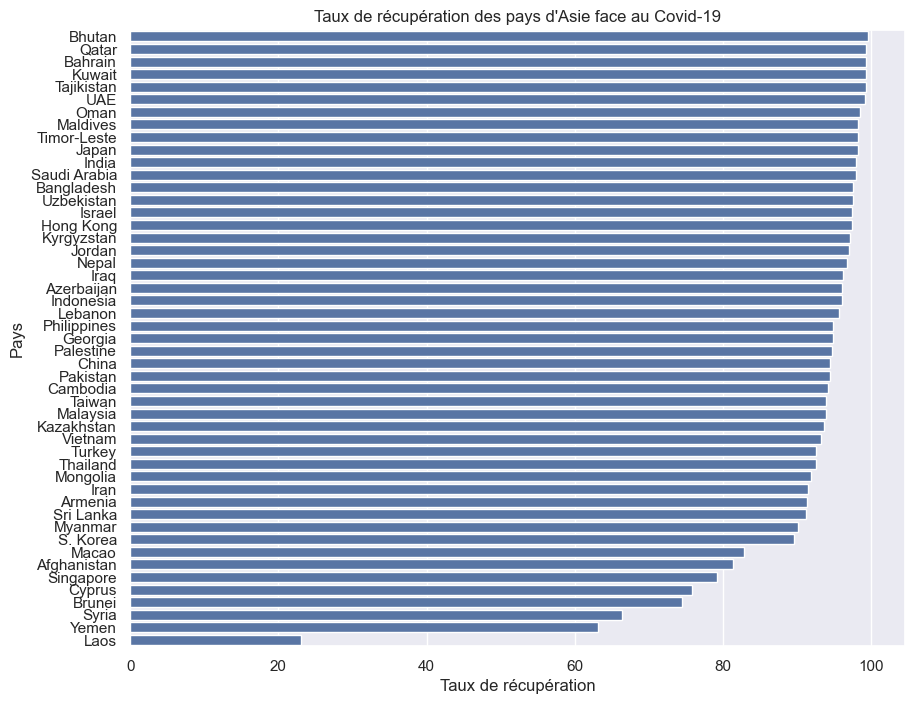

In [25]:
# taux de récupération (on calcul le par million nous même)
CovidCases["TotalRecoveredPerMillion"] = (CovidCases["TotalRecovered"] *1000000)/CovidCases["TotalPopulation"]
CovidCases["TauxRecuperation"] = CovidCases['TotalRecoveredPerMillion'] / CovidCases['TotalCasesPerMillion'] * 100 
plt.figure(figsize=(10,8))
sns.barplot(x='TauxRecuperation', y='Country', data=CovidCases.sort_values('TauxRecuperation', ascending=False))  
plt.ylabel('Pays')
plt.xlabel('Taux de récupération')  
plt.title("Taux de récupération des pays d'Asie face au Covid-19")
plt.show() 


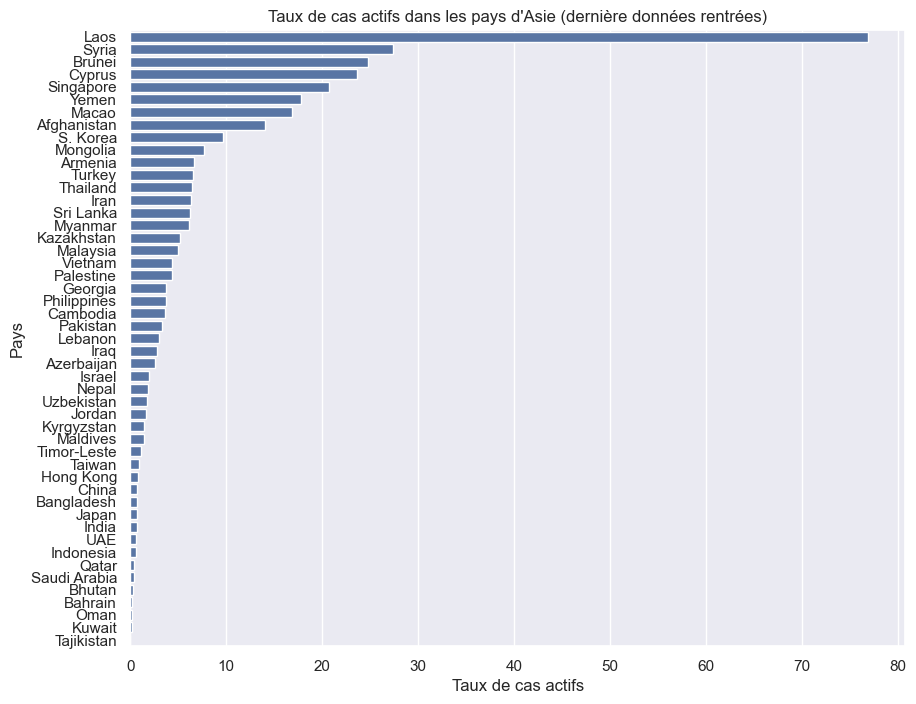

In [26]:
# taux de cas actif
CovidCases["TauxCasActifs"] = CovidCases['ActiveCases'] / CovidCases['TotalCases'] * 100 
plt.figure(figsize=(10,8))
sns.barplot(x='TauxCasActifs', y='Country', data=CovidCases.sort_values('TauxCasActifs', ascending=False))  
plt.ylabel('Pays')
plt.xlabel('Taux de cas actifs')  
plt.title("Taux de cas actifs dans les pays d'Asie (dernière données rentrées)")
plt.show()

## Calculs des seuils et recupération des pays en difficulté

In [27]:
# Pays qui sont en dessous/au dessus d'un seuil
pays_cas = CovidCases[(CovidCases['TotalCasesPerMillion'] > CovidCases['TotalCasesPerMillion'].quantile(0.9))]
pays_mortalite = CovidCases[(CovidCases['TauxMortalite'] > CovidCases['TauxMortalite'].quantile(0.9))]
pays_test = CovidCases[(CovidCases['TotalTestsPerMillion'] < CovidCases['TotalTestsPerMillion'].quantile(0.1) )]

print("Liste des pays au dessus du seuil de cas : \n\n", pays_cas[['Country', 'TotalCasesPerMillion', 'TotalTestsPerMillion', 'TauxMortalite']])
print("\nListe des pays au dessus du seuil de mortalité : \n\n", pays_mortalite[['Country', 'TotalCasesPerMillion', 'TotalTestsPerMillion', 'TauxMortalite']])
print("\nListe des pays en dessous du seuil de tests : \n\n", pays_test[['Country', 'TotalCasesPerMillion', 'TotalTestsPerMillion', 'TauxMortalite']])

Liste des pays au dessus du seuil de cas : 

      Country  TotalCasesPerMillion  TotalTestsPerMillion  TauxMortalite
22  Maldives                154797             2765865.0       0.273261
32    Israel                140074             2973538.0       0.606108
38   Georgia                159718             2336217.0       1.458195
39    Cyprus                 98184             7731251.0       0.467490
45   Bahrain                155162             3713470.0       0.503989

Liste des pays au dessus du seuil de mortalité : 

         Country  TotalCasesPerMillion  TotalTestsPerMillion  TauxMortalite
0         Yemen                   306                8651.0      18.954248
8        Taiwan                   683              282957.0       5.124451
9         Syria                  2048                5741.0       6.347656
40        China                    67              111163.0       4.477612
48  Afghanistan                  3884               19103.0       4.660144

Liste des pays en 

In [28]:
# Pays au dessus/en dessous de plusieurs seuils
pays_concat = pd.concat([pays_cas['Country'], pays_mortalite['Country'], pays_test['Country']])
pays_counts = pays_concat.value_counts()
pays_critique = pays_counts[pays_counts >= 2].index.tolist()

print("\nListe des pays qui dépassent plusieurs seuils : \n\n", CovidCases.loc[CovidCases['Country'].isin(pays_critique), ['Country', 'TotalCasesPerMillion', 'TotalTestsPerMillion', 'TauxMortalite']])


Liste des pays qui dépassent plusieurs seuils : 

         Country  TotalCasesPerMillion  TotalTestsPerMillion  TauxMortalite
0         Yemen                   306                8651.0      18.954248
9         Syria                  2048                5741.0       6.347656
48  Afghanistan                  3884               19103.0       4.660144


# PCA 

## TEST 1 PCA avec les variables : "ActiveCasesPerMillion", "TauxMortalite" 

In [29]:
# Préparation nous le PCA
CovidCases = pd.read_csv("CovidCases.csv", sep=",")
CovidCases.loc[CovidCases["Country"] == "Macao", :] = CovidCases.loc[CovidCases["Country"] == "Macao", :].fillna(0)
CovidCases = CovidCases.drop(columns=["ID"])
CovidCases['ActiveCasesPerMillion'] = CovidCases['ActiveCases'] * 1000000 / CovidCases['TotalPopulation']
colums_stand = CovidCases.columns[1:]
print(colums_stand)

# Calcul taux mortalité
CovidCases['TauxMortalite'] = CovidCases['TotalDeathsPerMillion'] / CovidCases['TotalCasesPerMillion'] * 100  

Index(['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'TotalCasesPerMillion', 'TotalDeathsPerMillion', 'TotalTests',
       'TotalTestsPerMillion', 'TotalPopulation', 'ActiveCasesPerMillion'],
      dtype='object')


* Standardiser les données

In [30]:
scaler = StandardScaler()
CovidCases[colums_stand] = scaler.fit_transform(CovidCases[colums_stand])
CovidCases.head()

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation,ActiveCasesPerMillion,TauxMortalite
0,Yemen,-0.319924,-0.318007,-0.314691,-0.446423,-0.951591,-0.802470,-0.341816,-0.631329,-0.230476,-0.526473,18.954248
1,Vietnam,-0.150225,-0.039896,-0.152277,-0.050404,-0.771978,-0.490234,0.151705,-0.401921,0.012555,-0.438405,2.450463
2,Uzbekistan,-0.285328,-0.325517,-0.279480,-0.429757,-0.843797,-0.845893,-0.328819,-0.614105,-0.218195,-0.516019,0.705972
3,UAE,-0.171025,-0.313031,-0.162927,-0.414832,0.646661,-0.486099,0.674164,4.073467,-0.304390,-0.418799,0.287165
4,Turkey,1.199714,0.635870,1.126328,4.984267,0.943722,0.678065,0.704550,-0.066330,-0.033904,1.017482,0.888868


* Selection des variables

In [31]:
CovidCases_without_country = CovidCases[["ActiveCasesPerMillion", "TauxMortalite"]]
CovidCases_without_country.head()

,ActiveCasesPerMillion,TauxMortalite
0,-0.526473,18.954248
1,-0.438405,2.450463
2,-0.516019,0.705972
3,-0.418799,0.287165
4,1.017482,0.888868


In [32]:
X = CovidCases_without_country.iloc[:, :].values

In [33]:
X

array([[-0.5264727 , 18.95424837],
       [-0.43840458,  2.45046313],
       [-0.51601883,  0.70597214],
       [-0.41879927,  0.28716469],
       [ 1.01748169,  0.88886847],
       [-0.4962565 ,  0.60402224],
       [-0.10862245,  1.03352865],
       [-0.54144368,  0.74626866],
       [-0.53968203,  5.12445095],
       [-0.38742573,  6.34765625],
       [-0.12068036,  2.53149027],
       [ 0.6822583 ,  0.12565737],
       [-0.52425684,  1.59491701],
       [-0.3689457 ,  0.77112893],
       [-0.44580364,  0.25544295],
       [-0.29751947,  1.48314794],
       [ 0.39088837,  1.02523058],
       [-0.49012154,  2.22941388],
       [-0.51187993,  1.34919534],
       [-0.40506935,  1.39945803],
       [-0.39497295,  3.78310214],
       [ 1.5301443 ,  0.4433432 ],
       [ 0.08024699,  0.27326111],
       [ 0.43283893,  1.16834913],
       [-0.53603464,  0.        ],
       [ 0.23131832,  1.33106464],
       [ 0.27299186,  0.10384216],
       [-0.43283738,  1.45971846],
       [-0.50208672,

* PCA :

In [34]:
pca = PCA()
X_pca=pca.fit_transform(X)

In [35]:
# Inertie expliquée
explained_variance = pca.explained_variance_ratio_ * 100
explained_variance

array([89.138568, 10.861432])

Choix du nombre d'axes : 

In [36]:
# Analyse des valeurs propres
n_components = len(pca.explained_variance_)
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(n_components)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,8.098534,89.0,89.0
1,Dim2,0.986797,11.0,100.0


/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_74899/2126420946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_comp = sns.barplot(x = "Dimension",
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_74899/2126420946.py:2: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  g_comp = sns.barplot(x = "Dimension",


Text(3.25, 26, '25%')

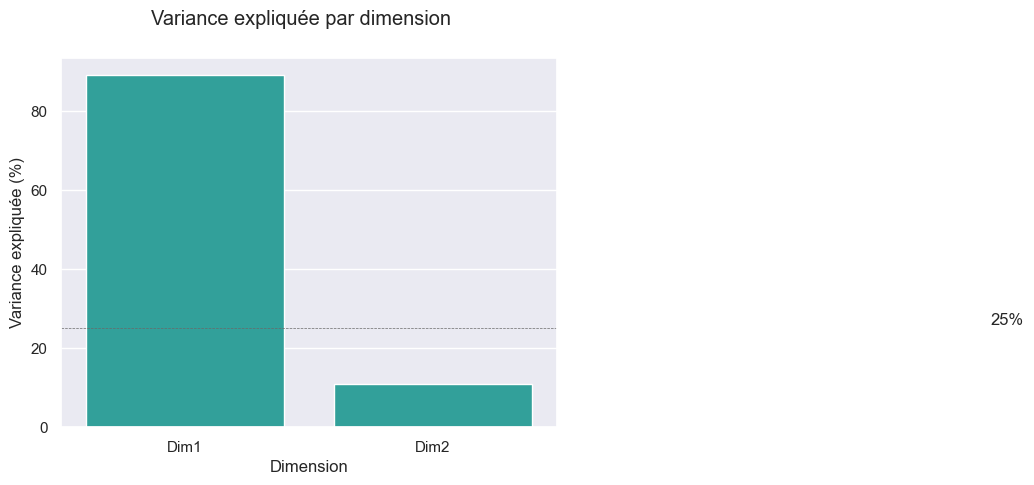

In [37]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

In [38]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(n_components)])
df_cos_squared.index = CovidCases_without_country.columns 

print(df_cos_squared)

                            PC1       PC2
ActiveCasesPerMillion  0.004786  0.995214
TauxMortalite          0.995214  0.004786


In [39]:
# Contribution à la formation de l'axe
components = pca.components_

n_components = X.shape[1]
feature_names=CovidCases_without_country.columns

loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

variable_contrib_df

,PC1_contrib,PC2_contrib
ActiveCasesPerMillion,0.038759,0.982074
TauxMortalite,8.059775,0.004723


In [40]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)
contrib_percent = contributions * 100

column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

    PC1_contrib  PC2_contrib
0     73.314205     0.887514
1      0.086646     0.328908
2      0.332438     0.736868
3      0.623604     0.578513
4      0.289699     1.849121
5      0.394782     0.705938
6      0.182060     0.058250
7      0.308593     0.793662
8      2.679717     0.205003
9      5.036737     0.012689
10     0.104911     0.012017
11     0.825927     0.644752
12     0.017190     0.611195
13     0.301458     0.410791
14     0.647436     0.644004
15     0.038009     0.218669
16     0.200872     0.225100
17     0.034393     0.448488
18     0.064820     0.621700
19     0.054352     0.397206
20     0.922027     0.143348
21     0.607085     4.206565
22     0.662563     0.002118
23     0.142863     0.301259
24     0.863830     0.916542
25     0.083803     0.076147
26     0.819961     0.045642
27     0.040801     0.441009
28     0.399910     0.721504
29     0.098471     0.015949
30     0.085572     0.098414
31     0.165255     0.679094
32     0.424609     0.027510
33     0.14761

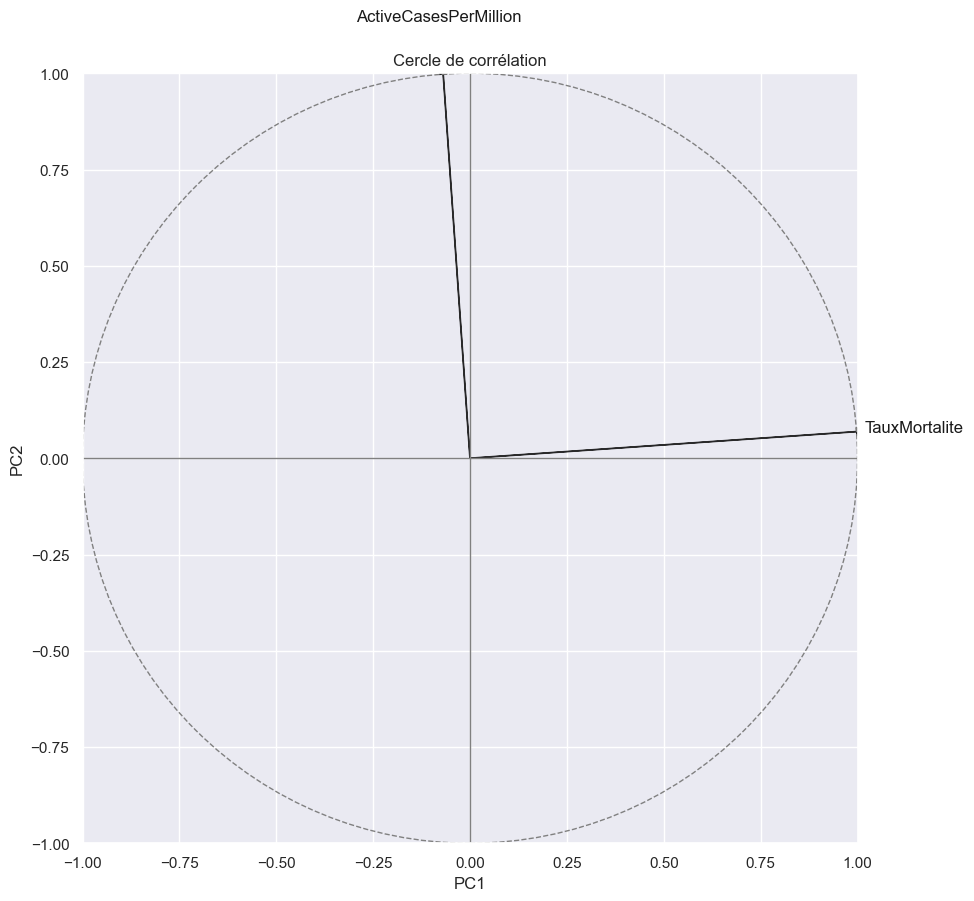

In [41]:
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

plt.figure(figsize=(10, 10))
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation')
plt.show()

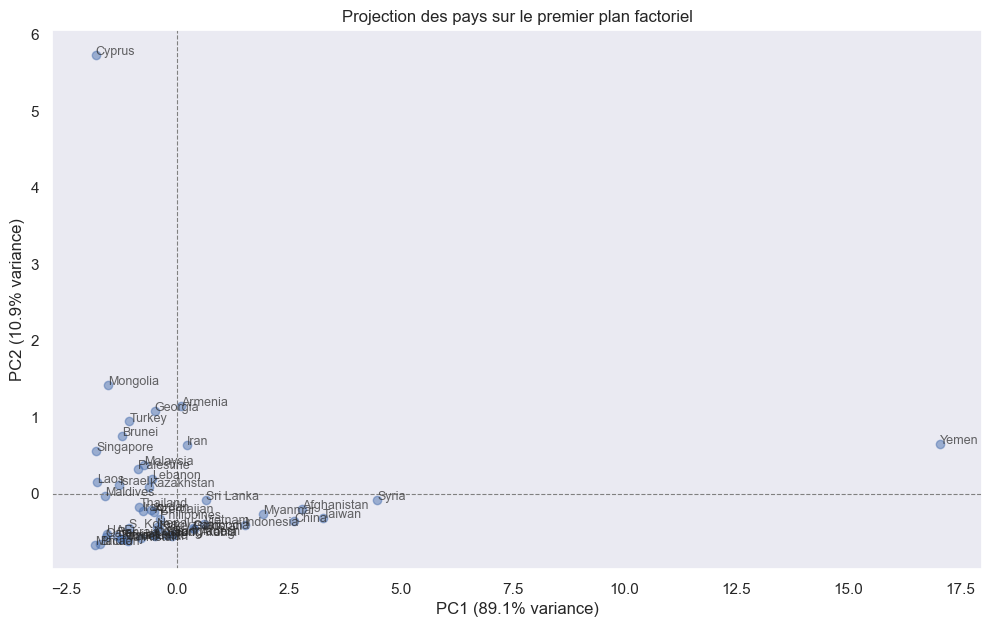

In [42]:
# Projection des pays
plt.figure(figsize=(12, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

for i, country in enumerate(CovidCases.iloc[:, 0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], country, fontsize=9, alpha=0.7)

plt.xlabel("PC1 ({}% variance)".format(round(explained_variance[0], 1)))
plt.ylabel("PC2 ({}% variance)".format(round(explained_variance[1], 1)))
plt.title("Projection des pays sur le premier plan factoriel")
plt.axhline(0, color="grey", linestyle="--", linewidth=0.8)
plt.axvline(0, color="grey", linestyle="--", linewidth=0.8)
plt.grid()
plt.show()


## TEST 1 bis PCA avec les variables : "ActiveCasesPerMillion", "TauxMortalite" ( sans le Yemen et Cyprus)

In [43]:
# Préparation nous le PCA
CovidCases = pd.read_csv("CovidCases.csv", sep=",")
CovidCases.loc[CovidCases["Country"] == "Macao", :] = CovidCases.loc[CovidCases["Country"] == "Macao", :].fillna(0)
CovidCases = CovidCases.drop(columns=["ID"])
CovidCases['ActiveCasesPerMillion'] = CovidCases['ActiveCases'] * 1000000 / CovidCases['TotalPopulation']
colums_stand = CovidCases.columns[1:]
print(colums_stand)

# Calcul taux mortalité
CovidCases['TauxMortalite'] = CovidCases['TotalDeathsPerMillion'] / CovidCases['TotalCasesPerMillion'] * 100  

# Supprimer Yemen et cyprus 
CovidCases = CovidCases[CovidCases['Country'] != 'Yemen']
CovidCases = CovidCases[CovidCases['Country'] != 'Cyprus']
print(CovidCases.shape)

Index(['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'TotalCasesPerMillion', 'TotalDeathsPerMillion', 'TotalTests',
       'TotalTestsPerMillion', 'TotalPopulation', 'ActiveCasesPerMillion'],
      dtype='object')
(47, 12)


* Standardiser les données

In [44]:
scaler = StandardScaler()
CovidCases[colums_stand] = scaler.fit_transform(CovidCases[colums_stand])
CovidCases.head()

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation,ActiveCasesPerMillion,TauxMortalite
1,Vietnam,-0.160316,-0.052823,-0.162205,-0.061871,-0.769560,-0.499654,0.136493,-0.389145,0.000492,-0.597567,2.450463
2,Uzbekistan,-0.292903,-0.333193,-0.287035,-0.434270,-0.841620,-0.850340,-0.334795,-0.633173,-0.225899,-0.740197,0.705972
3,UAE,-0.180729,-0.320937,-0.172657,-0.419619,0.653844,-0.495576,0.648909,4.757899,-0.310465,-0.561538,0.287165
4,Turkey,1.164477,0.610520,1.092535,4.880510,0.951902,0.652309,0.678712,-0.003189,-0.045089,2.077893,0.888868
5,Timor-Leste,-0.324787,-0.349942,-0.318834,-0.466606,-0.637187,-0.746357,-0.348638,-0.580120,-0.341037,-0.703880,0.604022


* Selection des variables

In [45]:
CovidCases_without_country = CovidCases[["ActiveCasesPerMillion", "TauxMortalite"]]
CovidCases_without_country.head()

,ActiveCasesPerMillion,TauxMortalite
1,-0.597567,2.450463
2,-0.740197,0.705972
3,-0.561538,0.287165
4,2.077893,0.888868
5,-0.703880,0.604022


In [46]:
X = CovidCases_without_country.iloc[:, :].values

In [47]:
X

array([[-0.5975666 ,  2.45046313],
       [-0.74019708,  0.70597214],
       [-0.56153822,  0.28716469],
       [ 2.07789268,  0.88886847],
       [-0.70388015,  0.60402224],
       [ 0.00846884,  1.03352865],
       [-0.78691992,  0.74626866],
       [-0.78368256,  5.12445095],
       [-0.50388356,  6.34765625],
       [-0.0136898 ,  2.53149027],
       [ 1.46185792,  0.12565737],
       [-0.75533594,  1.59491701],
       [-0.46992311,  0.77112893],
       [-0.61116372,  0.25544295],
       [-0.33866424,  1.48314794],
       [ 0.92641201,  1.02523058],
       [-0.69260603,  2.22941388],
       [-0.73259109,  1.34919534],
       [-0.53630695,  1.39945803],
       [-0.51775297,  3.78310214],
       [ 3.02000467,  0.4433432 ],
       [ 0.35555123,  0.27326111],
       [ 1.00350389,  1.16834913],
       [-0.77697981,  0.        ],
       [ 0.63317263,  1.33106464],
       [ 0.70975545,  0.10384216],
       [-0.58733584,  1.45971846],
       [-0.71459425,  0.59549577],
       [ 0.44854952,

* PCA :

In [48]:
pca = PCA()
X_pca=pca.fit_transform(X)

In [49]:
# Inertie expliquée
explained_variance = pca.explained_variance_ratio_ * 100
explained_variance

array([68.82075153, 31.17924847])

Choix du nombre d'axes : 

In [50]:
# Analyse des valeurs propres
n_components = len(pca.explained_variance_)
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(n_components)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.031389,69.0,69.0
1,Dim2,0.920321,31.0,100.0


/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_74899/2126420946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_comp = sns.barplot(x = "Dimension",
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_74899/2126420946.py:2: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  g_comp = sns.barplot(x = "Dimension",


Text(3.25, 26, '25%')

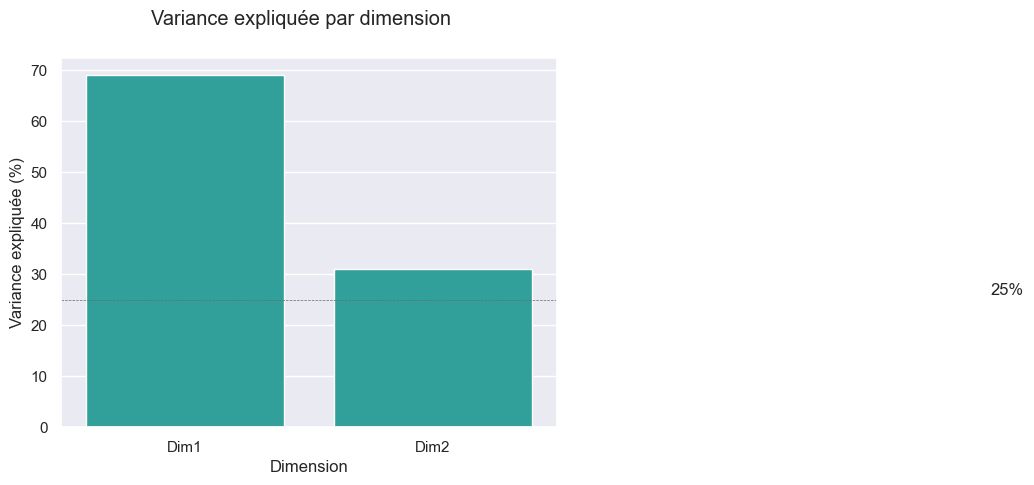

In [51]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

In [52]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(n_components)])
df_cos_squared.index = CovidCases_without_country.columns 

print(df_cos_squared)

                           PC1      PC2
ActiveCasesPerMillion  0.09128  0.90872
TauxMortalite          0.90872  0.09128


In [53]:
# Contribution à la formation de l'axe
components = pca.components_

n_components = X.shape[1]
feature_names=CovidCases_without_country.columns

loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

variable_contrib_df

,PC1_contrib,PC2_contrib
ActiveCasesPerMillion,0.185425,0.836314
TauxMortalite,1.845965,0.084007


In [54]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)
contrib_percent = contributions * 100

column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

    PC1_contrib  PC2_contrib
0      1.109018     0.209087
1      0.365682     2.147312
2      1.141787     1.956664
3      1.683873     7.307636
4      0.511808     2.130332
5      0.266919     0.052791
6      0.303553     2.293956
7     13.833756     0.251346
8     23.292347     2.157387
9      0.905567     0.181688
10     3.428968     2.130914
11     0.071404     1.164140
12     0.390273     1.089303
13     1.175376     2.206143
14     0.000861     0.277057
15     0.653781     1.203229
16     0.751396     0.485193
17     0.000419     1.342968
18     0.000077     0.724671
19     5.422083     0.073228
20     4.094941    14.931448
21     1.865066     0.005767
22     0.479942     1.624101
23     1.643744     3.396619
24     0.176003     0.659964
25     2.691171     0.129331
26     0.006951     0.805608
27     0.518995     2.187476
28     0.173558     0.269652
29     0.048801     0.085166
30     0.074866     1.711750
31     1.236002     0.167179
32     0.162344     0.127846
33     0.02404

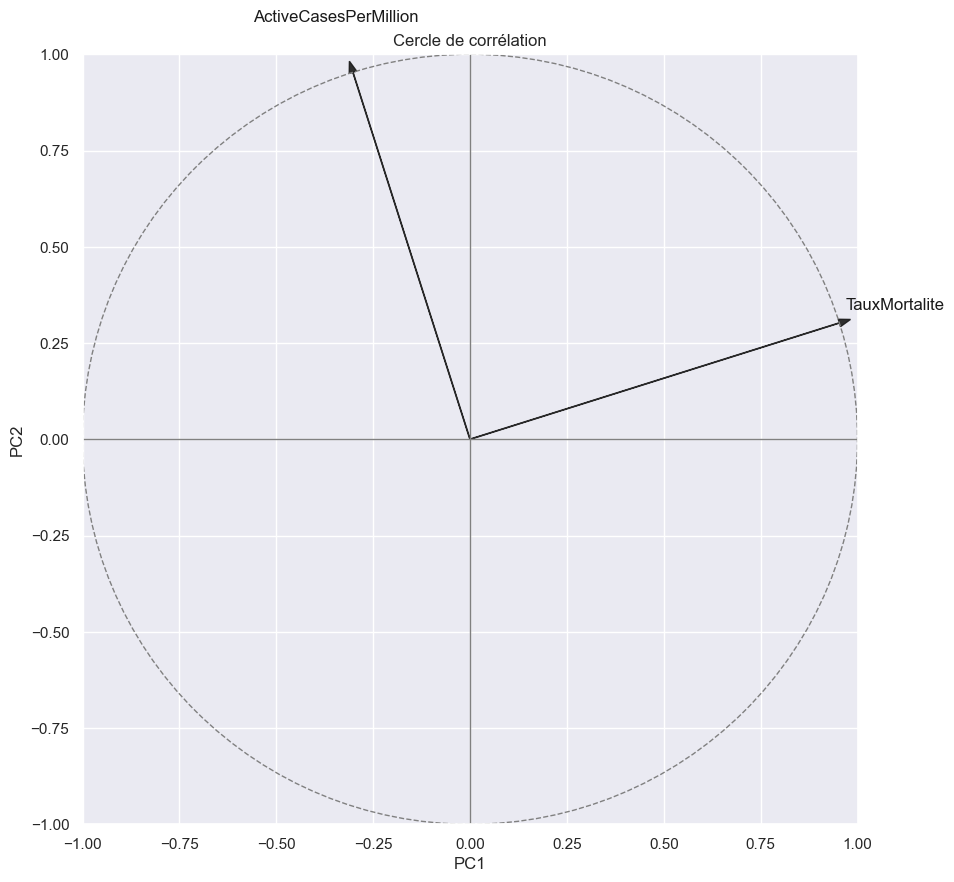

In [55]:
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

plt.figure(figsize=(10, 10))
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation')
plt.show()

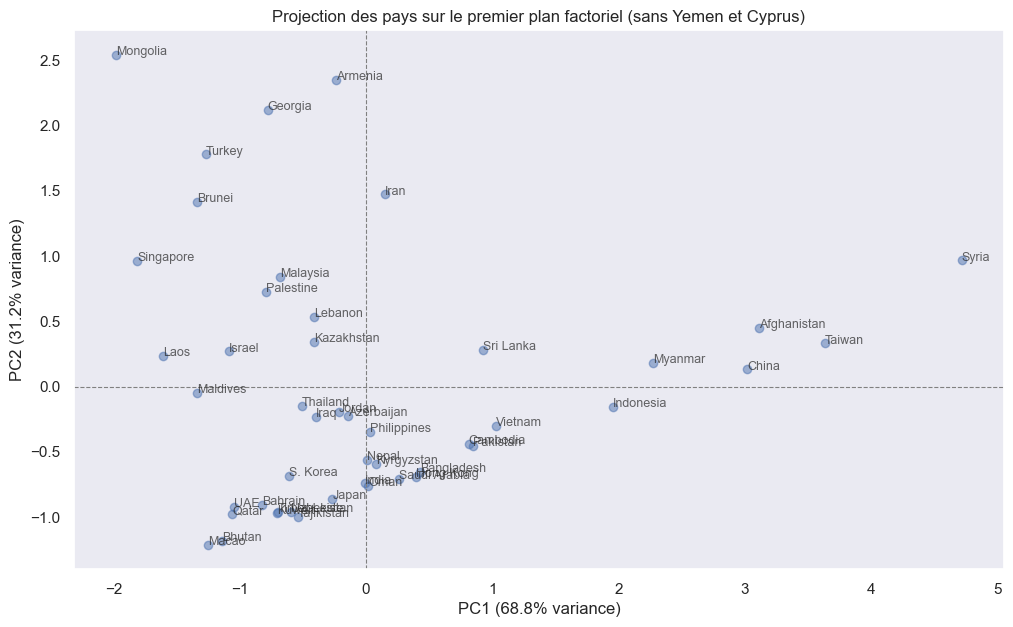

In [56]:
# Projection des pays
plt.figure(figsize=(12, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

for i, country in enumerate(CovidCases.iloc[:, 0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], country, fontsize=9, alpha=0.7)

plt.xlabel("PC1 ({}% variance)".format(round(explained_variance[0], 1)))
plt.ylabel("PC2 ({}% variance)".format(round(explained_variance[1], 1)))
plt.title("Projection des pays sur le premier plan factoriel (sans Yemen et Cyprus)")
plt.axhline(0, color="grey", linestyle="--", linewidth=0.8)
plt.axvline(0, color="grey", linestyle="--", linewidth=0.8)
plt.grid()
plt.show()


## TEST 2 PCA avec les variables : "TotalCasesPerMillion", "TotalDeathsPerMillion", "ActiveCasesPerMillion"

In [57]:
# Préparation nous le PCA
CovidCases = pd.read_csv("CovidCases.csv", sep=",")
CovidCases.loc[CovidCases["Country"] == "Macao", :] = CovidCases.loc[CovidCases["Country"] == "Macao", :].fillna(0)
CovidCases = CovidCases.drop(columns=["ID"])
CovidCases['ActiveCasesPerMillion'] = CovidCases['ActiveCases'] * 1000000 / CovidCases['TotalPopulation']
colums_stand = CovidCases.columns[1:]
print(colums_stand)


Index(['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'TotalCasesPerMillion', 'TotalDeathsPerMillion', 'TotalTests',
       'TotalTestsPerMillion', 'TotalPopulation', 'ActiveCasesPerMillion'],
      dtype='object')


* Standardiser les données

In [58]:
scaler = StandardScaler()
CovidCases[colums_stand] = scaler.fit_transform(CovidCases[colums_stand])
CovidCases.head()

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation,ActiveCasesPerMillion
0,Yemen,-0.319924,-0.318007,-0.314691,-0.446423,-0.951591,-0.802470,-0.341816,-0.631329,-0.230476,-0.526473
1,Vietnam,-0.150225,-0.039896,-0.152277,-0.050404,-0.771978,-0.490234,0.151705,-0.401921,0.012555,-0.438405
2,Uzbekistan,-0.285328,-0.325517,-0.279480,-0.429757,-0.843797,-0.845893,-0.328819,-0.614105,-0.218195,-0.516019
3,UAE,-0.171025,-0.313031,-0.162927,-0.414832,0.646661,-0.486099,0.674164,4.073467,-0.304390,-0.418799
4,Turkey,1.199714,0.635870,1.126328,4.984267,0.943722,0.678065,0.704550,-0.066330,-0.033904,1.017482


* Selection des variables

In [59]:
CovidCases_without_country = CovidCases[["TotalCasesPerMillion", "TotalDeathsPerMillion", "ActiveCasesPerMillion"]]
CovidCases_without_country.head()

,TotalCasesPerMillion,TotalDeathsPerMillion,ActiveCasesPerMillion
0,-0.951591,-0.802470,-0.526473
1,-0.771978,-0.490234,-0.438405
2,-0.843797,-0.845893,-0.516019
3,0.646661,-0.486099,-0.418799
4,0.943722,0.678065,1.017482


In [60]:
X = CovidCases_without_country.iloc[:, :].values

In [61]:
X

array([[-0.9515909 , -0.8024699 , -0.5264727 ],
       [-0.77197841, -0.49023416, -0.43840458],
       [-0.84379719, -0.84589341, -0.51601883],
       [ 0.64666106, -0.48609859, -0.41879927],
       [ 0.94372174,  0.67806512,  1.01748169],
       [-0.64004852, -0.74043631, -0.4962565 ],
       [-0.42146865, -0.39718378, -0.10862245],
       [-0.92022479, -0.89552028, -0.54144368],
       [-0.94335621, -0.85002898, -0.53968203],
       [-0.91354093, -0.65358928, -0.38742573],
       [-0.42417715,  0.35755824, -0.12068036],
       [-0.48894074, -0.86657127,  0.6822583 ],
       [-0.62137301, -0.41372607, -0.52425684],
       [-0.81664672, -0.81901219, -0.3689457 ],
       [ 0.88872183, -0.47575966, -0.44580364],
       [-0.43398452, -0.18626957, -0.29751947],
       [ 0.76105126,  0.74630207,  0.39088837],
       [-0.83678569, -0.665996  , -0.49012154],
       [ 0.3012625 ,  0.68633627, -0.51187993],
       [-0.36985436, -0.14284606, -0.40506935],
       [-0.76774092, -0.24003201, -0.394

* PCA :

In [62]:
pca = PCA()
X_pca=pca.fit_transform(X)

In [63]:
# Inertie expliquée
explained_variance = pca.explained_variance_ratio_ * 100
explained_variance

array([66.31124702, 24.28586127,  9.40289171])

Choix du nombre d'axes : 

In [64]:
# Analyse des valeurs propres
n_components = len(pca.explained_variance_)
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(n_components)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.030782,66.0,66.0
1,Dim2,0.743755,24.0,91.0
2,Dim3,0.287964,9.0,100.0


/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_74899/2126420946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_comp = sns.barplot(x = "Dimension",
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_74899/2126420946.py:2: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  g_comp = sns.barplot(x = "Dimension",


Text(3.25, 26, '25%')

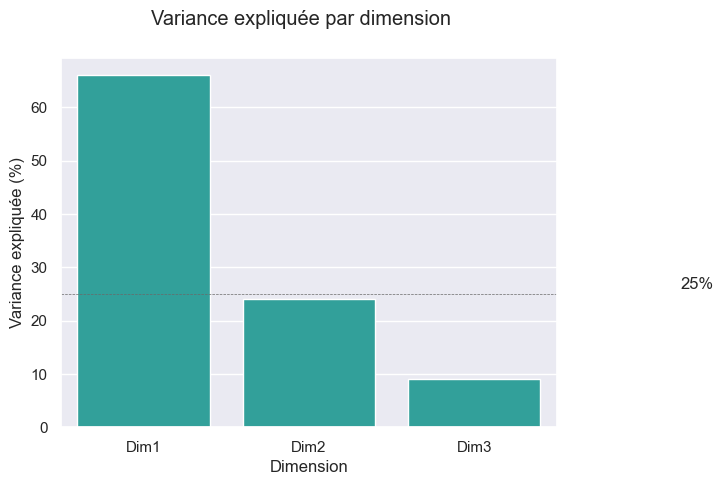

In [65]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

In [66]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(n_components)])
df_cos_squared.index = CovidCases_without_country.columns 

print(df_cos_squared)

                            PC1       PC2       PC3
TotalCasesPerMillion   0.406285  0.372325  0.221390
TotalDeathsPerMillion  0.054388  0.184240  0.761372
ActiveCasesPerMillion  0.539327  0.443435  0.017237


In [67]:
# Contribution à la formation de l'axe
components = pca.components_

n_components = X.shape[1]
feature_names=CovidCases_without_country.columns

loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

variable_contrib_df

,PC1_contrib,PC2_contrib,PC3_contrib
TotalCasesPerMillion,0.825075,0.040451,0.155307
TotalDeathsPerMillion,0.756111,0.137029,0.127693
ActiveCasesPerMillion,0.449596,0.566274,0.004964


In [68]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)
contrib_percent = contributions * 100

column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

    PC1_contrib  PC2_contrib  PC3_contrib
0      1.815044     0.031407     0.064425
1      0.999872     0.000172     0.237137
2      1.689971     0.032965     0.000915
3      0.006672     0.259610     5.163664
4      2.243138     0.389343     0.082576
5      1.201149     0.003185     0.055098
6      0.317530     0.083071     0.006711
7      1.935363     0.043942     0.000498
8      1.896945     0.035631     0.022140
9      1.360181     0.066380     0.242024
10     0.011935     0.070116     2.019165
11     0.271114     3.208254     0.116861
12     0.805323     0.049973     0.088892
13     1.432392     0.132889     0.000247
14     0.004433     0.421738     7.489650
15     0.282578     0.016884     0.171616
16     1.270524     0.067418     0.000799
17     1.376520     0.007810     0.080662
18     0.137552     1.806992     0.201429
19     0.264988     0.116307     0.107766
20     0.678475     0.010740     0.878737
21     2.119986     3.157586     3.277558
22     2.423752     0.617918    22

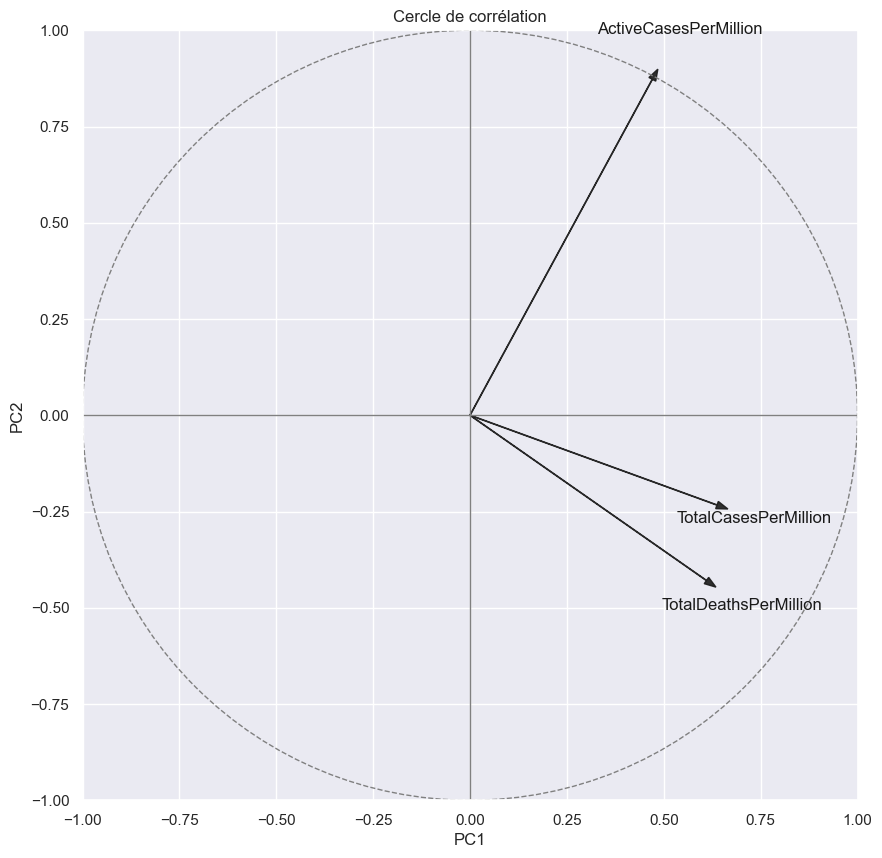

In [69]:
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

plt.figure(figsize=(10, 10))
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation')
plt.show()

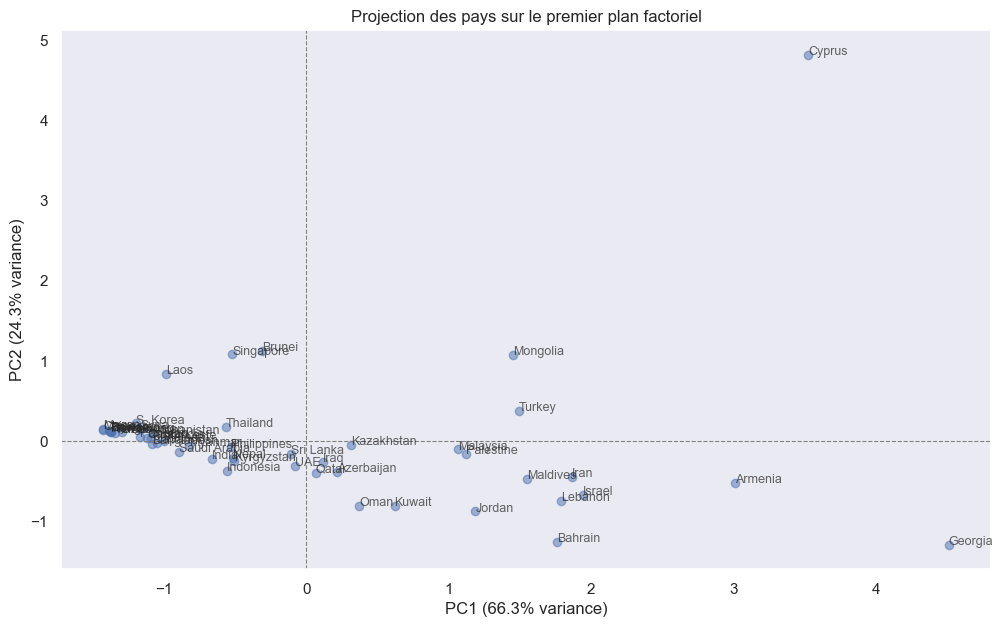

In [70]:
# Projection des pays
plt.figure(figsize=(12, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

for i, country in enumerate(CovidCases.iloc[:, 0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], country, fontsize=9, alpha=0.7)

plt.xlabel("PC1 ({}% variance)".format(round(explained_variance[0], 1)))
plt.ylabel("PC2 ({}% variance)".format(round(explained_variance[1], 1)))
plt.title("Projection des pays sur le premier plan factoriel")
plt.axhline(0, color="grey", linestyle="--", linewidth=0.8)
plt.axvline(0, color="grey", linestyle="--", linewidth=0.8)
plt.grid()
plt.show()
